Welcome to the Hotel Booking Cancellation Prediction dataset, a comprehensive collection of data aimed at predicting hotel booking cancellations. This dataset is ideal for data scientists, researchers, and machine learning enthusiasts seeking to develop models that can accurately forecast the likelihood of hotel reservation cancellations.

Dataset Overview:
This dataset comprises a diverse range of features, including booking details, customer information, and reservation specifics. The information has been meticulously gathered from real-world hotel booking scenarios, ensuring authenticity and relevance for predictive modeling.

Step 1: Import **Libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('/content/booking.csv')

In [4]:
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df.shape

(36285, 17)

In [10]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [13]:
df.index

RangeIndex(start=0, stop=36285, step=1)

In [17]:
df.dtypes

,0
Booking_ID,object
number of adults,int64
number of children,int64
number of weekend nights,int64
number of week nights,int64
type of meal,object
car parking space,int64
room type,object
lead time,int64
market segment type,object


In [18]:
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled


In [22]:
df['Booking_ID'] = le.fit_transform(df['Booking_ID'])
df['type of meal'] = le.fit_transform(df['type of meal'])
df['room type'] = le.fit_transform(df['room type'])
df['market segment type'] = le.fit_transform(df['market segment type'])
df['date of reservation'] = le.fit_transform(df['date of reservation'])
df['booking status'] = le.fit_transform(df['booking status'])

print("\nEncoded Data:")
print(df)



Encoded Data:
       Booking_ID  number of adults  number of children  \
0               0                 1                   1   
1               1                 1                   0   
2               2                 2                   1   
3               3                 1                   0   
4               4                 1                   0   
...           ...               ...                 ...   
36280       36280                 2                   0   
36281       36281                 2                   0   
36282       36282                 2                   0   
36283       36283                 3                   0   
36284       36284                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5             0   
1                             1                      3             3   
2                             1                      3      

In [23]:
df.corr()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
Booking_ID,1.000000,-0.009292,0.001552,-0.000034,0.001003,-0.012385,-0.006661,-0.002410,-0.000387,-0.051225,-0.001153,0.005194,0.001423,-0.002727,-0.014738,0.002576,-0.006307
number of adults,-0.009292,1.000000,-0.020027,0.103316,0.105416,0.025359,0.011467,0.270501,0.097014,0.314021,-0.192175,-0.047395,-0.119106,0.296832,0.189317,0.109966,-0.086774
number of children,0.001552,-0.020027,1.000000,0.029536,0.024680,-0.086872,0.034198,0.363802,-0.047058,0.130536,-0.036371,-0.016398,-0.021201,0.337491,0.124363,0.045736,-0.033007
number of weekend nights,-0.000034,0.103316,0.029536,1.000000,0.179548,-0.027293,-0.031102,0.057334,0.046510,0.129048,-0.067096,-0.020687,-0.026307,-0.004565,0.060432,0.008553,-0.061489
number of week nights,0.001003,0.105416,0.024680,0.179548,1.000000,-0.083478,-0.048814,0.094142,0.149600,0.112940,-0.099782,-0.030089,-0.049354,0.022751,0.046136,0.025339,-0.092824
type of meal,-0.012385,0.025359,-0.086872,-0.027293,-0.083478,1.000000,-0.012997,-0.209199,-0.060316,0.203363,-0.062991,-0.011623,-0.038180,-0.069268,0.022023,0.018189,-0.026772
car parking space,-0.006661,0.011467,0.034198,-0.031102,-0.048814,-0.012997,1.000000,0.038778,-0.066444,-0.003734,0.110916,0.027109,0.063814,0.061310,0.087889,0.019974,0.086179
room type,-0.002410,0.270501,0.363802,0.057334,0.094142,-0.209199,0.038778,1.000000,-0.107830,0.156631,-0.025819,-0.007934,-0.008136,0.469908,0.145159,0.048459,-0.022877
lead time,-0.000387,0.097014,-0.047058,0.046510,0.149600,-0.060316,-0.066444,-0.107830,1.000000,-0.007080,-0.135966,-0.045718,-0.078126,-0.062578,-0.101604,0.086549,-0.438491
market segment type,-0.051225,0.314021,0.130536,0.129048,0.112940,0.203363,-0.003734,0.156631,-0.007080,1.000000,-0.337748,-0.074228,-0.207140,0.375597,0.308467,0.057473,-0.136005


array([[<Axes: title={'center': 'Booking_ID'}>,
        <Axes: title={'center': 'number of adults'}>,
        <Axes: title={'center': 'number of children'}>,
        <Axes: title={'center': 'number of weekend nights'}>],
       [<Axes: title={'center': 'number of week nights'}>,
        <Axes: title={'center': 'type of meal'}>,
        <Axes: title={'center': 'car parking space'}>,
        <Axes: title={'center': 'room type'}>],
       [<Axes: title={'center': 'lead time'}>,
        <Axes: title={'center': 'market segment type'}>,
        <Axes: title={'center': 'repeated'}>,
        <Axes: title={'center': 'P-C'}>],
       [<Axes: title={'center': 'P-not-C'}>,
        <Axes: title={'center': 'average price'}>,
        <Axes: title={'center': 'special requests'}>,
        <Axes: title={'center': 'date of reservation'}>],
       [<Axes: title={'center': 'booking status'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

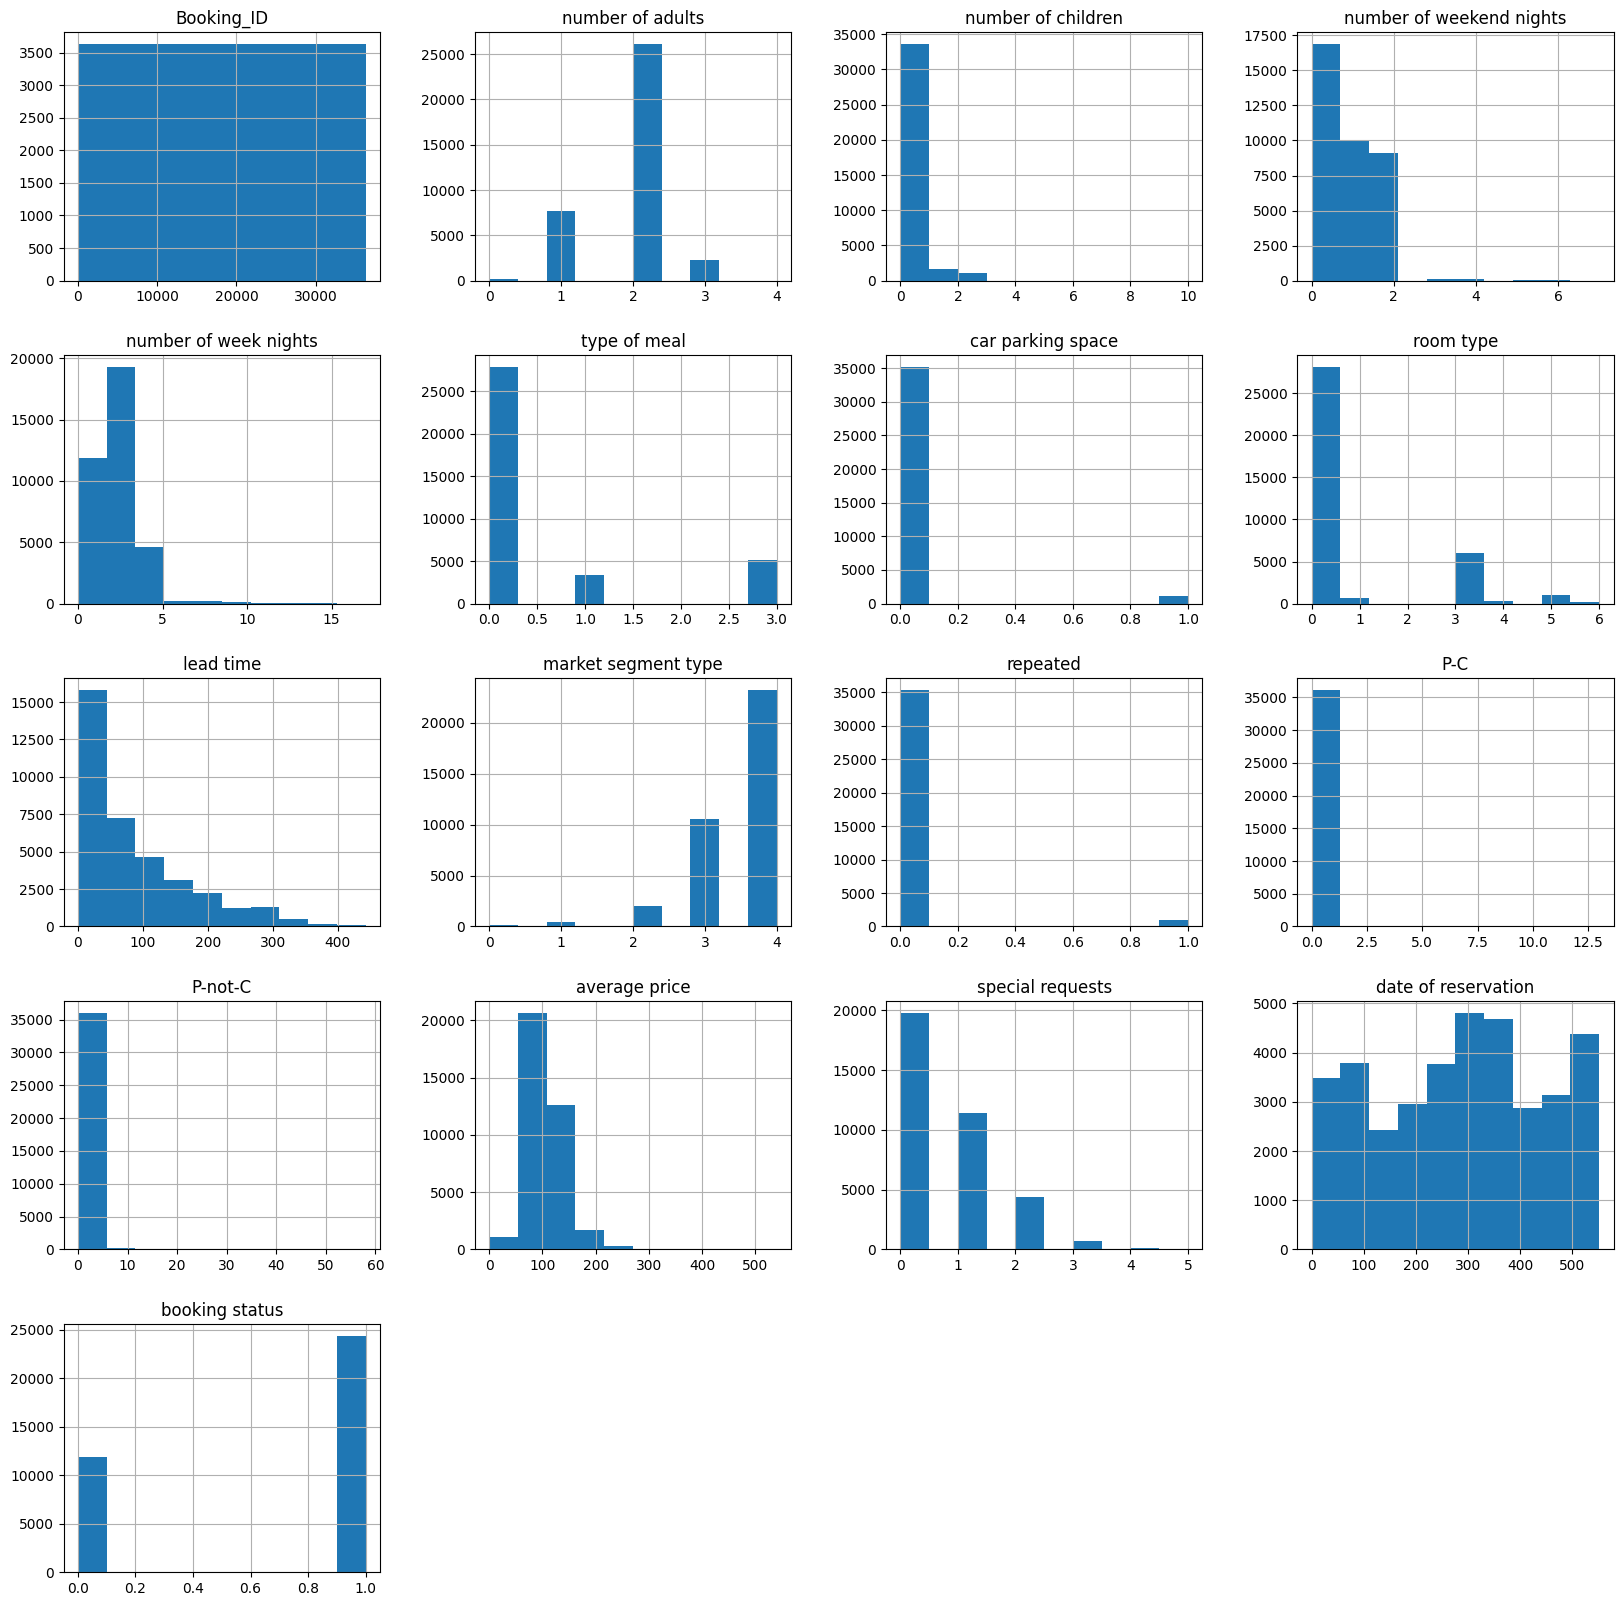

In [24]:
df.hist(figsize = (20,20))

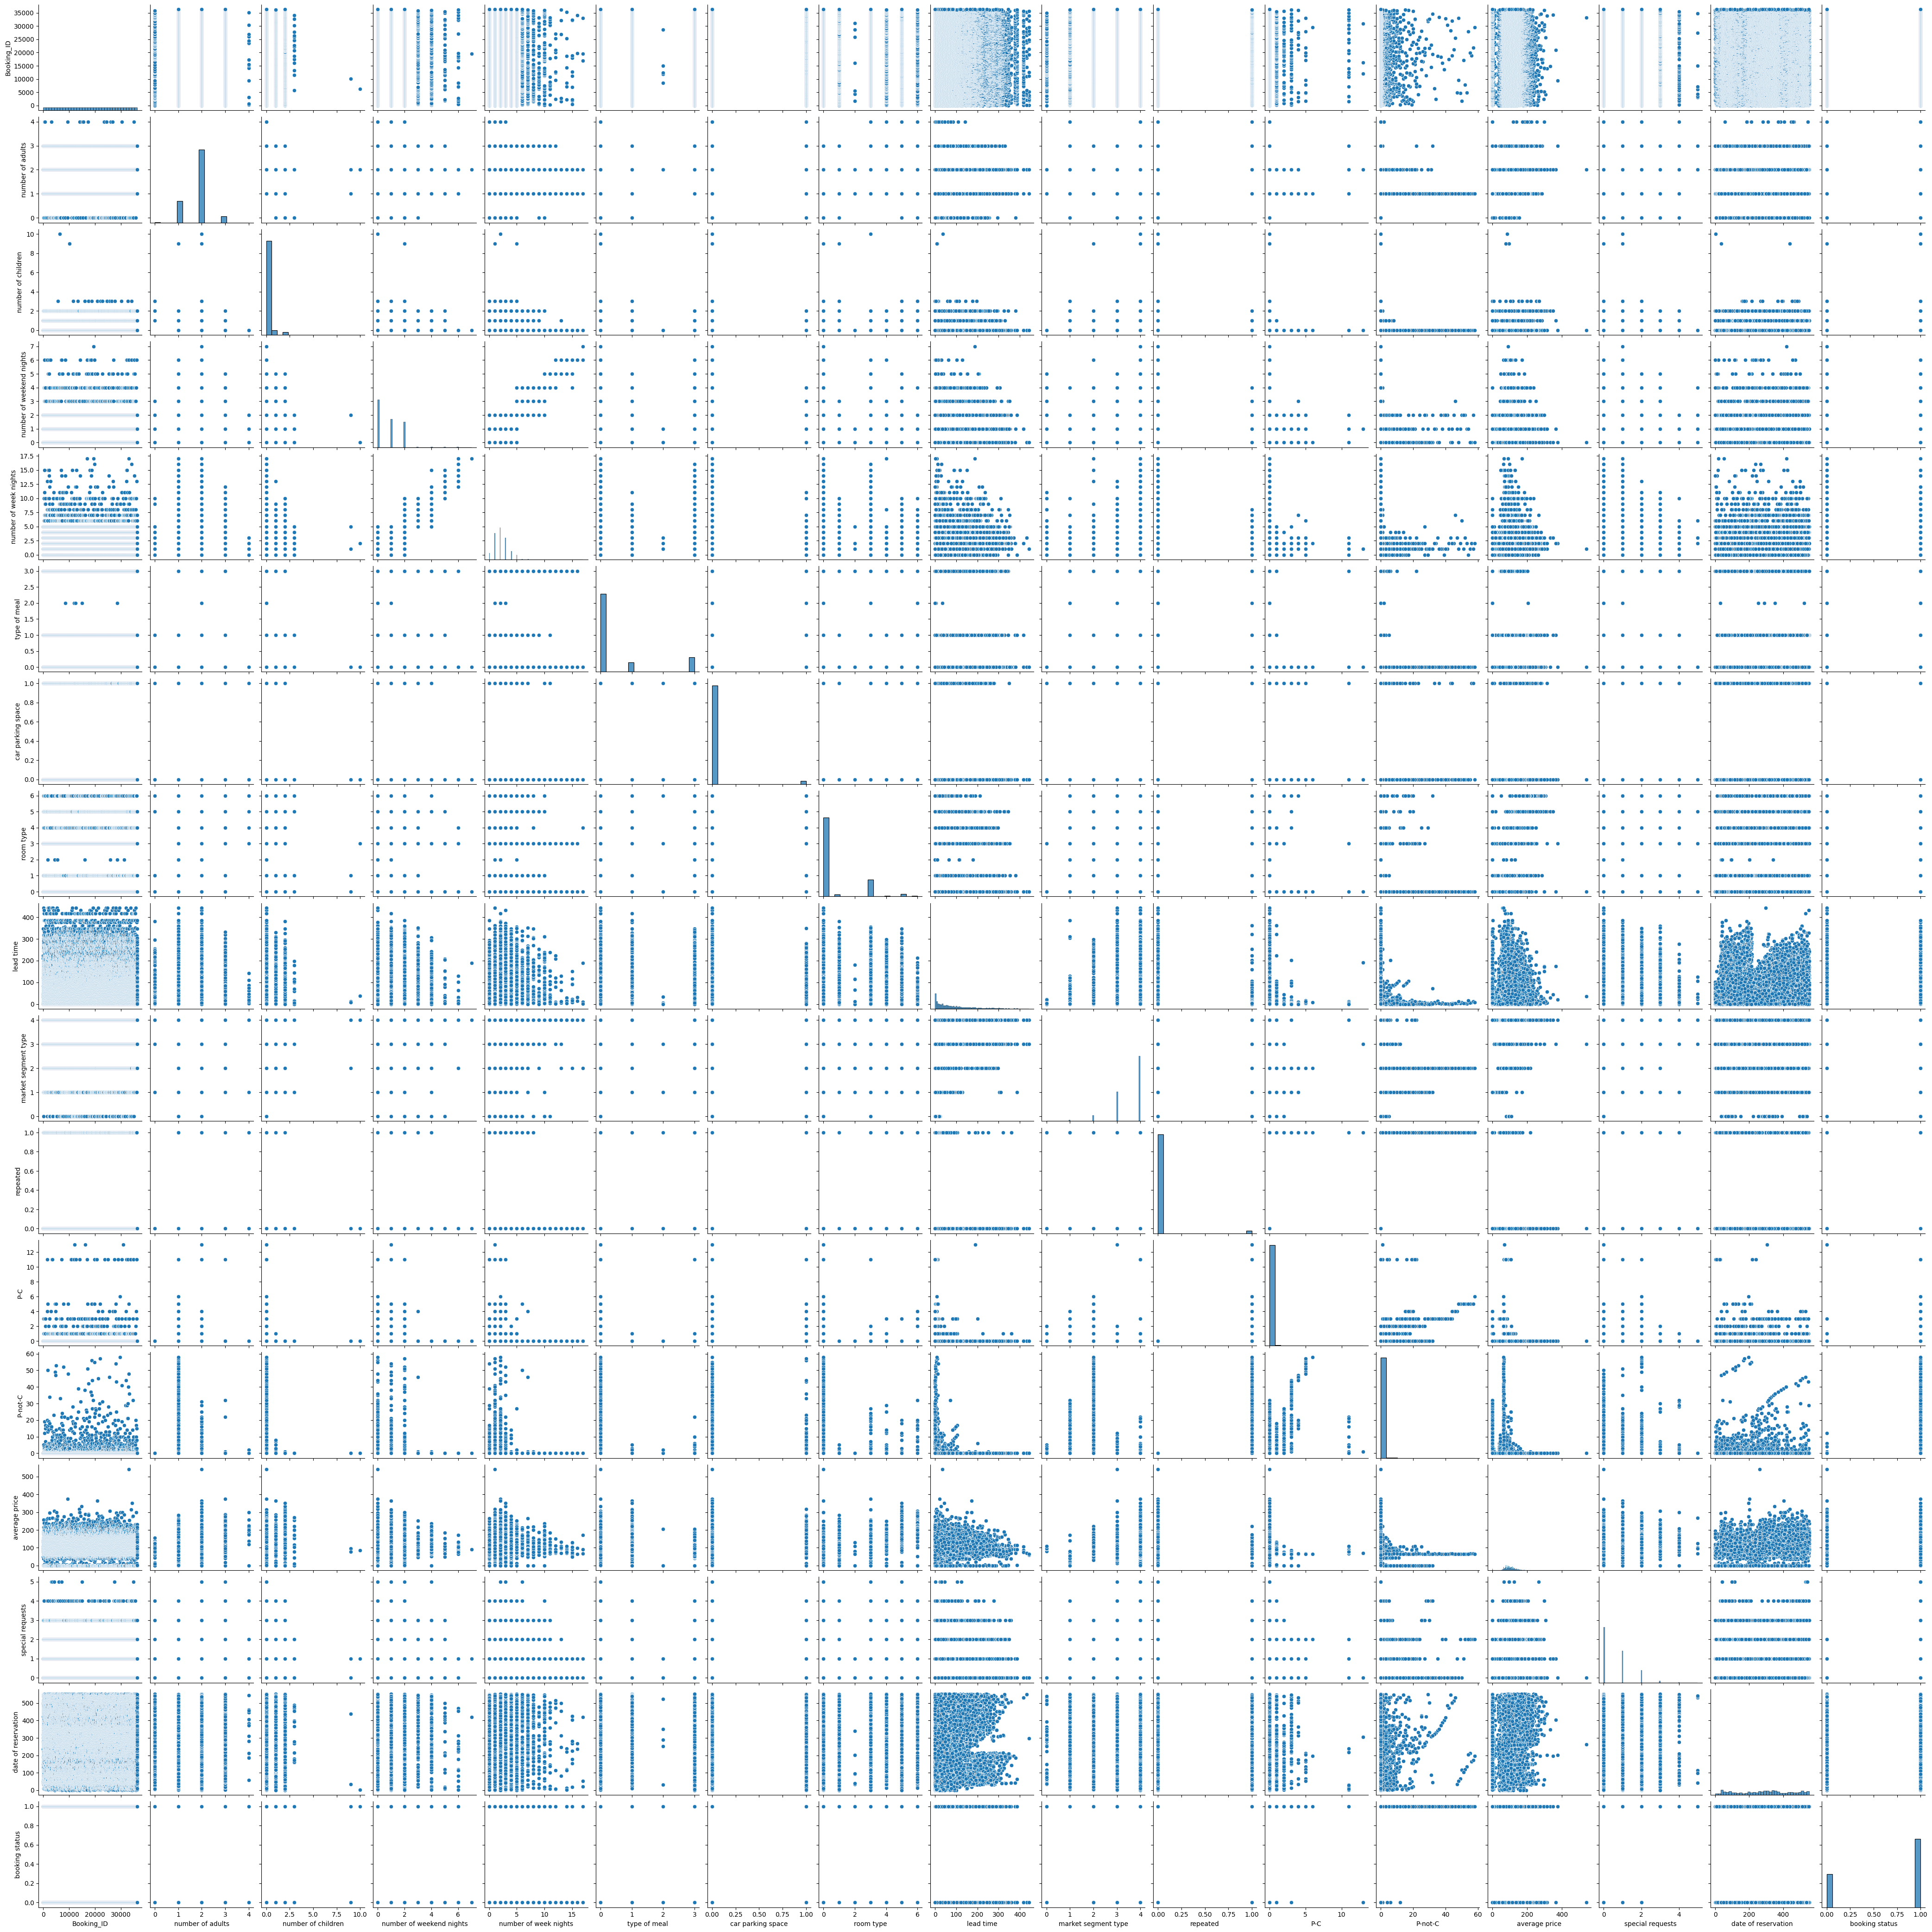

In [29]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

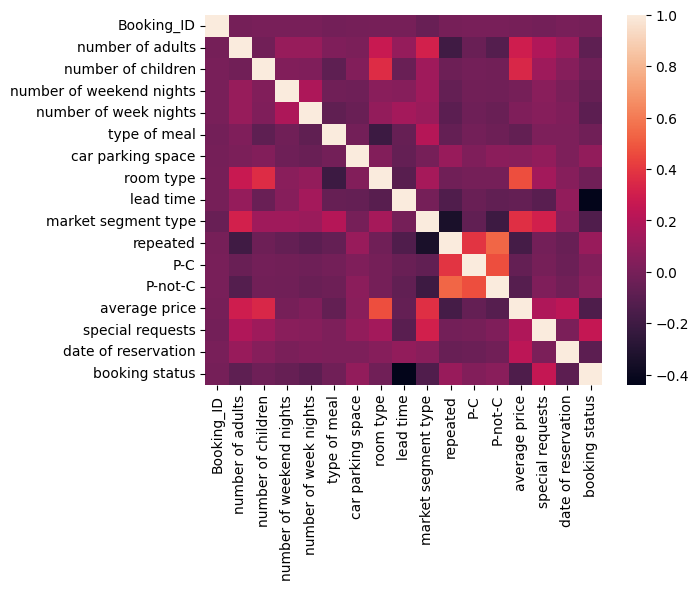

In [30]:

sns.heatmap(df.corr())

In [31]:
# Describe the dataset
df.describe()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,18142.000000,1.844839,0.105360,0.810693,2.204602,0.515695,0.030977,0.708860,85.239851,3.552487,0.025630,0.023343,0.153369,103.421636,0.619733,285.541022,0.672344
std,10474.721595,0.518813,0.402704,0.870590,1.410946,1.048177,0.173258,1.399801,85.938796,0.681489,0.158032,0.368281,1.753931,35.086469,0.786262,157.098256,0.469365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9071.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,80.300000,0.000000,147.000000,0.000000
50%,18142.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,295.000000,1.000000
75%,27213.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,415.000000,1.000000
max,36284.000000,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,552.000000,1.000000


In [33]:
# Define feature variables (X) and the target variable (y)
X = df.drop('booking status', axis=1)
y = df['booking status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
0,0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,53
1,1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,147
2,2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,236
3,3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,318
4,4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,36280,2,0,0,2,1,0,0,346,4,0,0,0,115.00,1,502
36281,36281,2,0,1,3,0,0,0,34,4,0,0,0,107.55,1,43
36282,36282,2,0,1,3,0,0,3,83,4,0,0,0,105.61,1,191
36283,36283,3,0,0,4,0,0,0,121,3,0,0,0,96.90,1,423


In [35]:
y

,booking status
0,1
1,1
2,0
3,0
4,0
...,...
36280,0
36281,1
36282,1
36283,1


In [36]:
X_train

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
387,387,3,0,1,3,0,0,3,155,4,0,0,0,115.6,1,191
7768,7768,1,0,2,2,0,0,3,48,4,0,0,0,149.4,0,512
11792,11792,2,0,1,2,0,0,0,305,3,0,0,0,89.0,0,143
7978,7978,1,0,0,2,0,0,0,102,4,0,0,0,86.4,2,209
10670,10670,2,2,1,2,0,0,5,9,4,0,0,0,221.0,0,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,16850,2,0,2,2,0,0,0,43,3,0,0,0,55.0,2,190
6265,6265,1,0,0,2,1,0,0,102,4,0,0,0,80.0,0,45
11284,11284,2,0,0,2,0,0,0,5,2,0,0,0,110.0,1,323
860,860,2,0,0,3,0,0,0,213,4,0,0,0,130.0,0,365


In [37]:
y_test

,booking status
36238,0
83,1
23449,1
14981,1
18392,1
...,...
19588,0
5010,0
9986,0
33253,1


In [38]:
y_train

,booking status
387,0
7768,0
11792,0
7978,0
10670,0
...,...
16850,1
6265,0
11284,1
860,0


In [40]:
X_test

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
36238,36238,1,0,0,1,3,0,0,117,4,0,0,0,161.10,1,97
83,83,2,0,1,4,0,0,3,40,4,0,0,0,98.82,0,250
23449,23449,1,0,0,1,0,1,0,7,2,1,0,7,98.00,1,352
14981,14981,1,0,2,1,0,0,0,116,4,0,0,0,1.00,0,236
18392,18392,2,0,1,0,0,0,0,141,3,0,0,0,90.00,0,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19588,19588,2,0,0,2,0,0,3,186,4,0,0,0,118.80,1,433
5010,5010,2,0,0,1,3,0,0,12,4,0,0,0,79.00,0,231
9986,9986,2,0,2,4,0,0,0,28,4,0,0,0,131.60,0,297
33253,33253,2,0,0,1,3,0,0,2,4,0,0,0,81.00,0,18


In [41]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [48]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1920  482]
 [ 263 4592]]


In [51]:
print("Unique classes in the target column:", y.unique())  # This helps us understand the target classes

Unique classes in the target column: [1 0]


In [52]:

# Now plot the decision tree
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>